This code uses the K-Nearest Neighbors (KNN) method to predict values from data. It helps load and organize data, create charts, prepare the data for the model, train the model, and check how accurate its predictions are. The process includes splitting the data into training and testing sets, scaling the features so the model works better, and then measuring how well the model performs.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import data set

In [22]:
df = pd.read_csv(r'/workspaces/CS_Group_09_Salary_prediction/data/Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


drop null values

In [23]:
df = df[['Age', 'Gender', 'Job Title', 'Education Level', 'Years of Experience', 'Salary']].dropna()

df.shape simply shows the size of your dataset, telling you how many entries (rows) it has and how many details (columns) each entry includes.

In [24]:
df.shape

(6698, 6)

shows the quick summery of the data set


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Job Title            6698 non-null   object 
 3   Education Level      6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


gives a quick summary of the numerical columns in your dataset.

In [26]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [27]:
df.duplicated().sum()


np.int64(4911)

splitting your dataset into input and output parts for machine learning.

In [28]:

X = df.iloc[:, :-1]  # independent variables
y = df.iloc[:, -1]   # salary column

This code converts all text (categorical) columns in your dataset into numbers so the machine-learning model can understand them.

In [29]:
import pandas as pd

# Assuming your dataset is already loaded
# df = pd.read_csv("your_dataset.csv")

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply IQR method to remove outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only data within range
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("✅ Outliers removed successfully!")
print("Remaining data shape:", df.shape)


✅ Outliers removed successfully!
Remaining data shape: (6550, 6)


encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object':  # If column contains text
        X[col] = le.fit_transform(X[col])

This code divides the data into two parts: one for the model to learn from and one to test 
how well it performs. Most of the data (80%) is used for training, and the rest (20%) is used to check the 
model’s predictions. Setting random_state=42 makes sure the split is the same every time we run the code.

In [31]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

trains and create a knn regression model with  3 neighbors

In [32]:

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

showing how many colums and rows are trained

In [33]:
X_train.shape

(5358, 5)

This code checks how well the model is doing. It measures the average difference between predicted and actual values using MAE, looks at bigger errors more with MSE and RMSE, and uses the R² score to see how much of the data’s variation the model can explain. At the end, it prints these results so we can easily understand the model’s accuracy.

In [34]:
# ✅ Performance Evaluation
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5   # RMSE manually

r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 3626.1703980099505
MSE: 95450832.19444445
RMSE: 9769.894175191686
R2 Score: 0.9665256193849595


This code tests different values of k for the K-Nearest Neighbors model to find the one that works best. It loops through k from 1 to 20, trains the model with each k, and records the mean absolute error (MAE) and R² score for the predictions. Then, it plots MAE vs k and R² vs k side by side so you can visually see which k gives the lowest error and highest R². Finally, it identifies the best k based on the lowest MAE and prints the corresponding MAE and R² score.

Best k by MAE: 1
Corresponding MAE: 3208.7611940298507
Corresponding R2: 0.9577083095816075


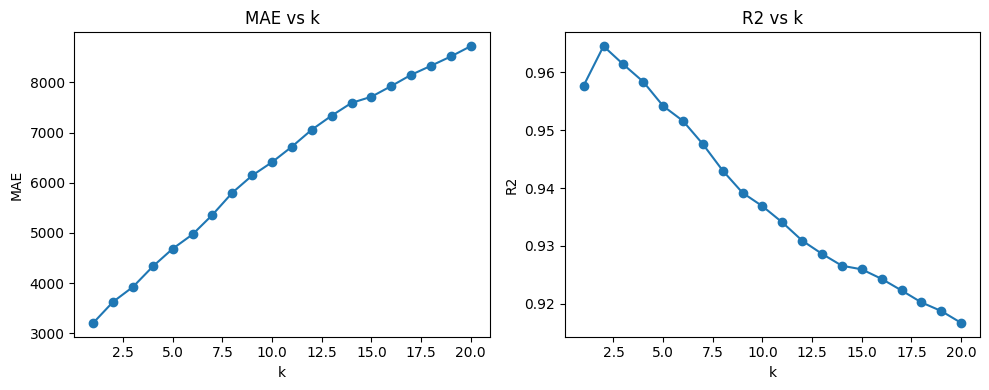

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

errors = []
r2_scores = []
ks = list(range(1, 21))
for k in ks:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    errors.append(mean_absolute_error(y_test, pred))
    r2_scores.append(r2_score(y_test, pred))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(ks, errors, marker='o')
plt.xlabel('k')
plt.ylabel('MAE')
plt.title('MAE vs k')

plt.subplot(1,2,2)
plt.plot(ks, r2_scores, marker='o')
plt.xlabel('k')
plt.ylabel('R2')
plt.title('R2 vs k')
plt.tight_layout()

best_k = ks[int(np.argmin(errors))]
print('Best k by MAE:', best_k)
print('Corresponding MAE:', min(errors))
print('Corresponding R2:', r2_scores[np.argmin(errors)])

In [36]:
final_knn = KNeighborsRegressor(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)
y_pred_final = final_knn.predict(X_test_scaled)

# Final metrics
mae_f = mean_absolute_error(y_test, y_pred_final)
mse_f = mean_squared_error(y_test, y_pred_final)
rmse_f = mse_f ** 0.5
r2_f = r2_score(y_test, y_pred_final)

print('Final KNN Performance (k={}):'.format(best_k))
print('MAE:', round(mae_f,2))
print('MSE:', round(mse_f,2))
print('RMSE:', round(rmse_f,2))
print('R2 Score:', round(r2_f,4))

Final KNN Performance (k=1):
MAE: 3208.76
MSE: 120593031.78
RMSE: 10981.49
R2 Score: 0.9577


This code tests the model more thoroughly by using 5-fold cross-validation. It splits the data into 5 parts, trains the model on most of it, and checks predictions on the rest, repeating this 5 times. Then it calculates the R² score each time and prints the average, giving a clearer idea of how well the model performs overall.

In [37]:

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Average Cross-Validation R2 Score:", cv_scores.mean())

Average Cross-Validation R2 Score: 0.5519117840767509


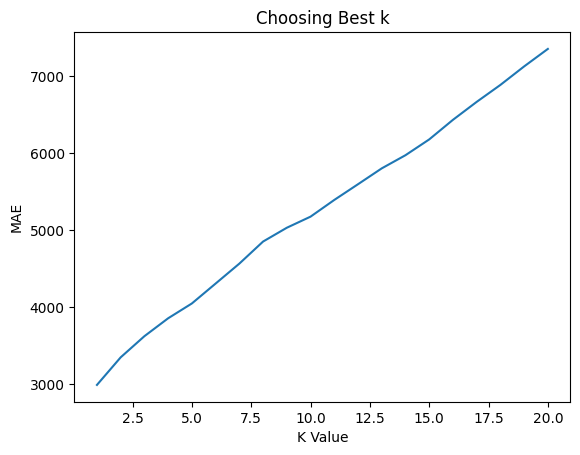

In [38]:
errors = []
for k in range(1, 21):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    errors.append(mean_absolute_error(y_test, pred))

plt.plot(range(1,21), errors)
plt.xlabel('K Value')
plt.ylabel('MAE')
plt.title('Choosing Best k')
plt.show()


In [39]:
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Predict on test data
y_test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

print("Train R²:", train_r2)
print("Test R²:", test_r2)

Train R²: 0.9502681436809544
Test R²: 0.9382325252462974


In [41]:
import joblib

# Save KNN model
joblib.dump(model, "KNN_salary_model.pkl")
print("\nModel saved as KNN_salary_model.pkl")


Model saved as KNN_salary_model.pkl
